In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("new_insurance_data.csv")
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [26]:
df.shape

(1338, 13)

In [27]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [28]:
df = df.dropna()

In [29]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [ ]:
# Visualisation

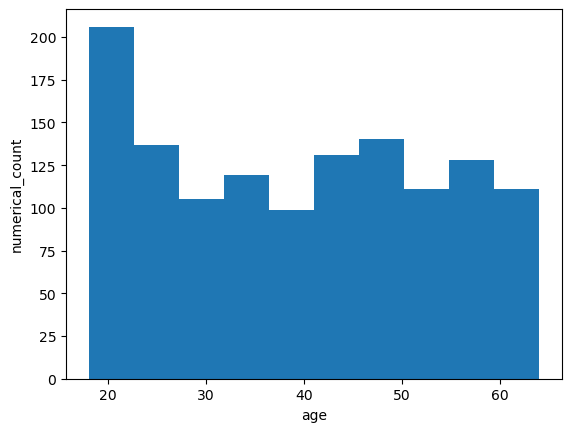

In [18]:
plt.hist(df["age"])
plt.xlabel('age')
plt.ylabel('numerical_count')
plt.show()

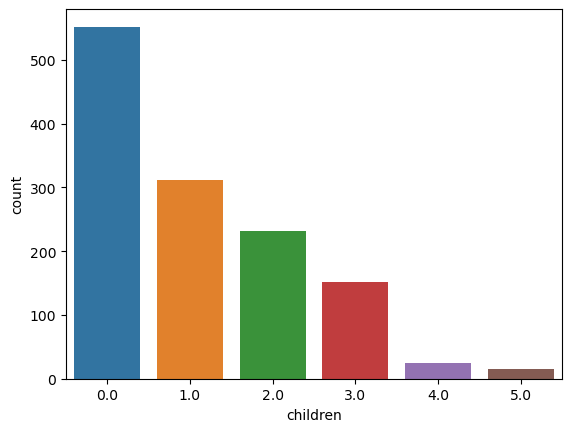

In [29]:
sns.countplot(x = "children", data = df);

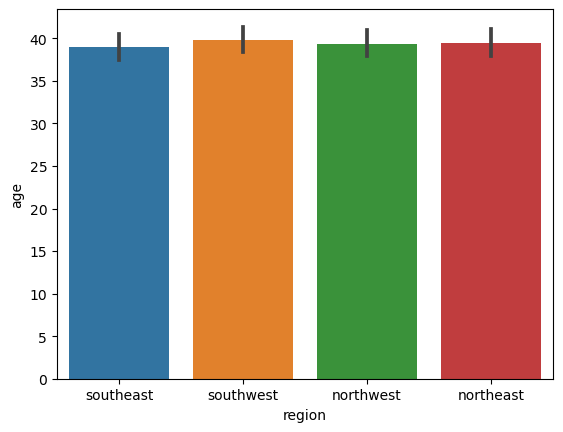

In [40]:
sns.barplot(x = "region", y = "age" , data = df );

In [44]:
df1 = df.groupby("region" , as_index = False)["num_of_steps"].sum()
df1

,region,num_of_steps
0,northeast,289733802.0
1,northwest,285270951.0
2,southeast,316687608.0
3,southwest,281250891.0


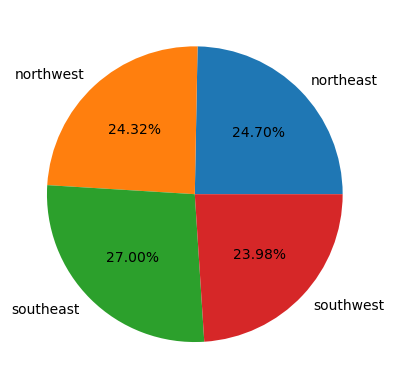

In [46]:
plt.pie(df1["num_of_steps"], labels = df1["region"], autopct = '%1.2f%%');

In [31]:
# Detecting/Eliminating Outliers
# To detect outlier,we have to create boxplot for every column via for loop
col = df.columns
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

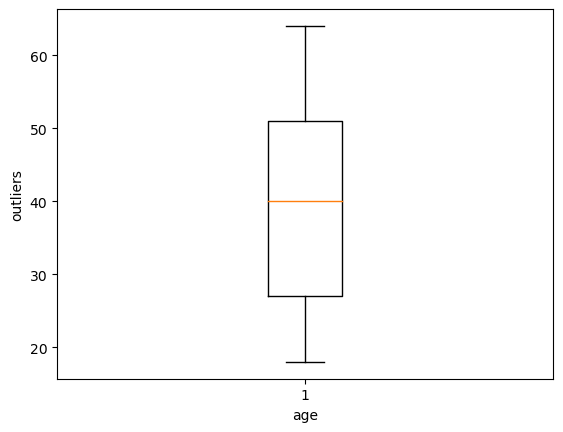

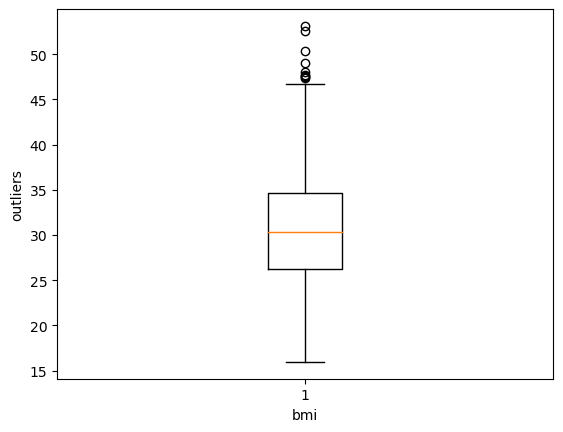

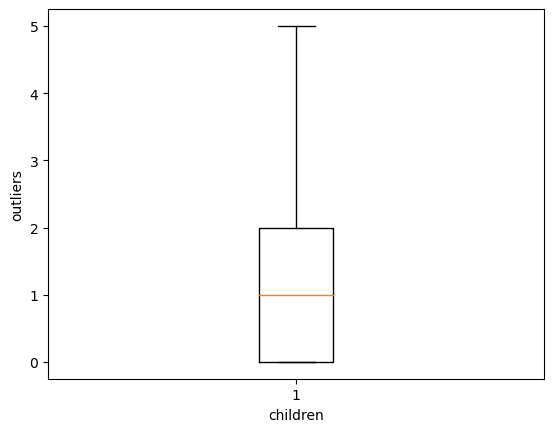

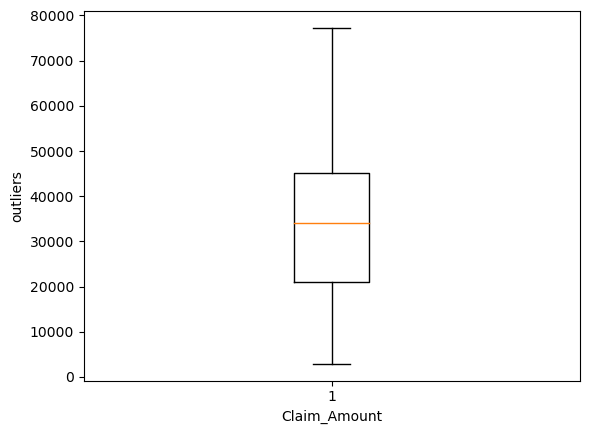

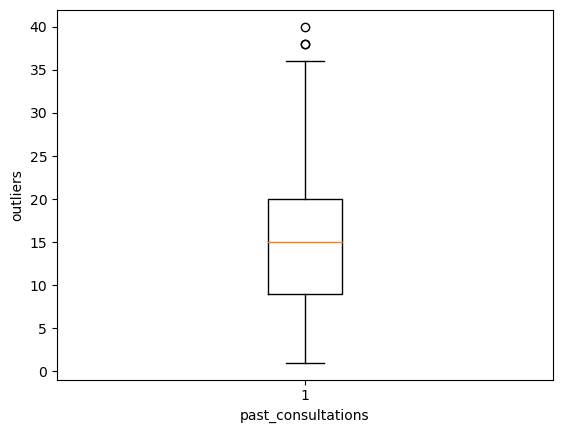

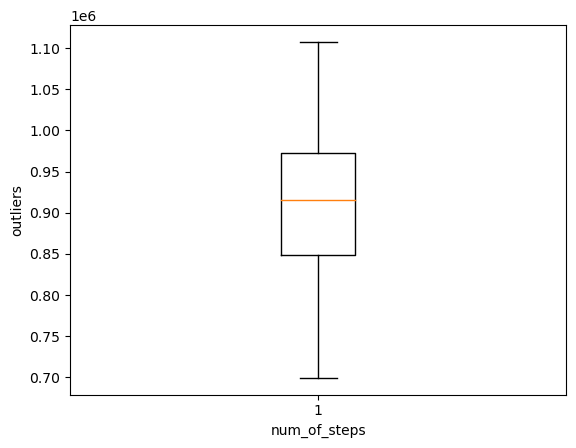

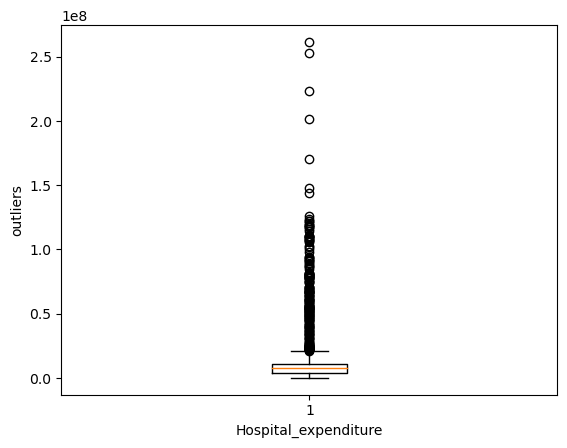

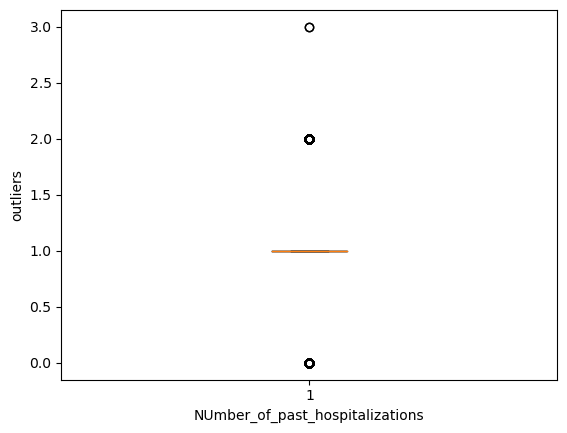

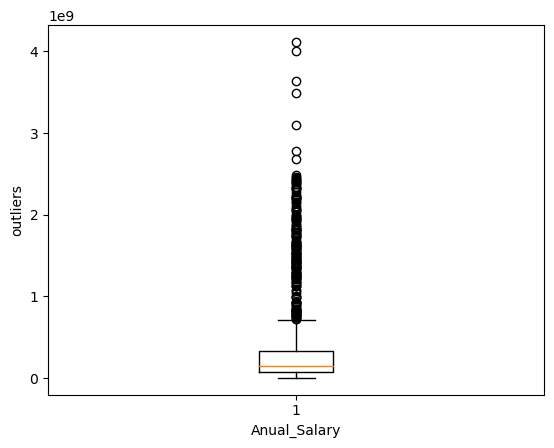

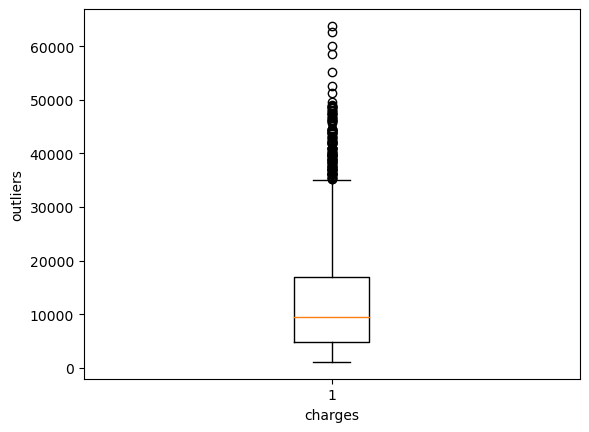

In [32]:
for i in col:
    if (df[i].dtypes=='int64' or df[i].dtypes=='float64'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('outliers')
        plt.show()

In [33]:
#From above we can see outliers are present in below columns:
# bmi,past_consultations,Hospital_expenditure,Number of past hospitalizations,anual salary,charges
# Now removing the outliers from all the columns except the last column(y) i.e charges here

# For past_consultations column
Q1 = df.past_consultations.quantile(0.25)
Q3 = df.past_consultations.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

df = df[(df.past_consultations >= Q1 - 1.5 * (IQR)) & (df.past_consultations <= Q3 + 1.5 * (IQR))]

# For Hospital_expenditure column
Q1 = df.Hospital_expenditure.quantile(0.25)
Q3 = df.Hospital_expenditure.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

df = df[(df.Hospital_expenditure >= Q1 - 1.5 * (IQR)) & (df.Hospital_expenditure <= Q3 + 1.5 * (IQR))]

# For NUmber_of_past_hospitilizations column
Q1 = df.NUmber_of_past_hospitalizations.quantile(0.25)
Q3 = df.NUmber_of_past_hospitalizations.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

df = df[(df.NUmber_of_past_hospitalizations >= Q1 - 1.5 * (IQR)) & (df.NUmber_of_past_hospitalizations <= Q3 + 1.5 * (IQR))]

# For Anual_Salary column
Q1 = df.Anual_Salary.quantile(0.25)
Q3 = df.Anual_Salary.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

df = df[(df.Anual_Salary >= Q1 - 1.5 * (IQR)) & (df.Anual_Salary <= Q3 + 1.5 * (IQR))]
    


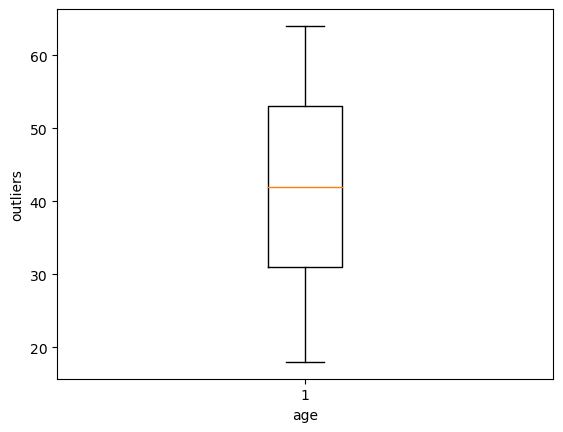

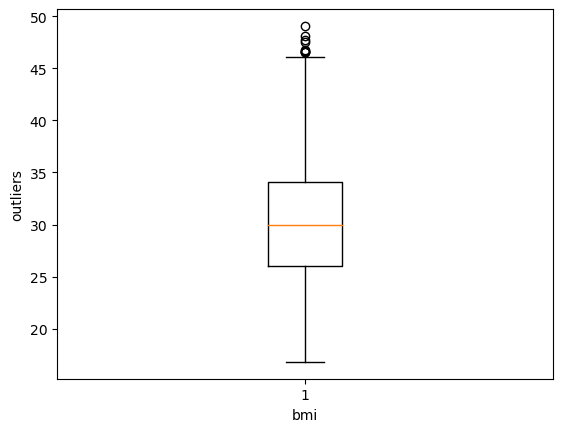

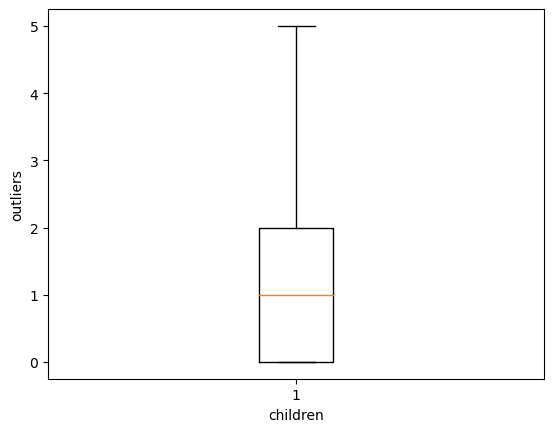

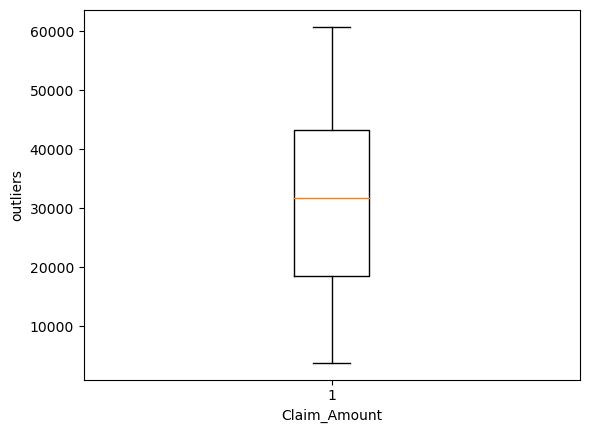

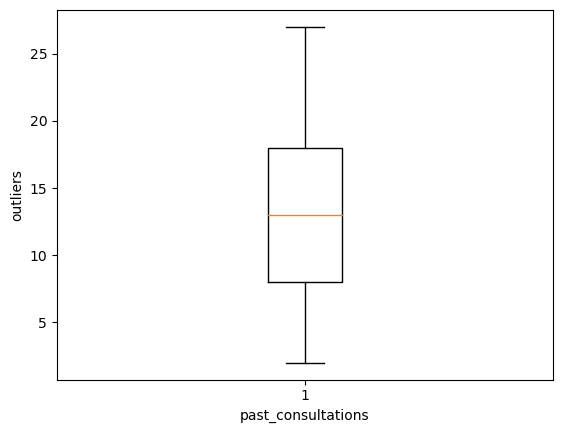

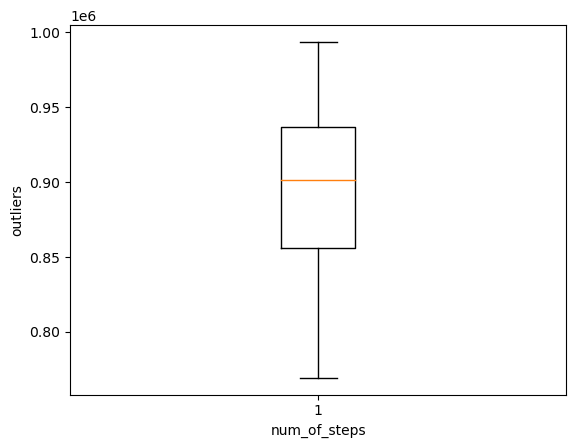

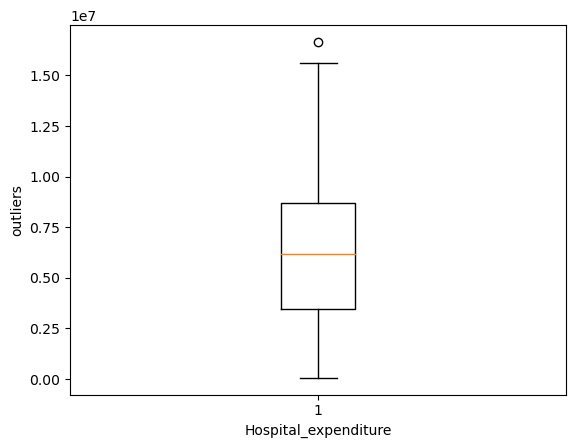

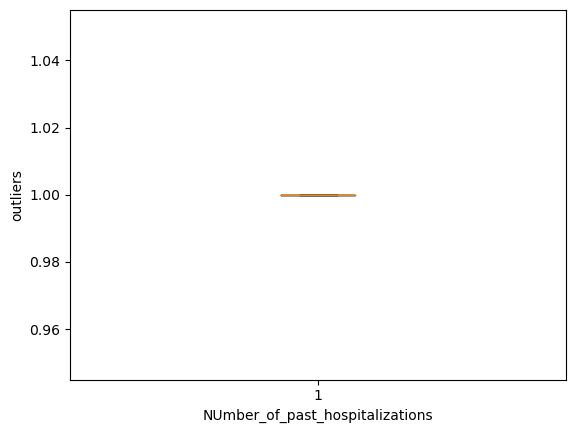

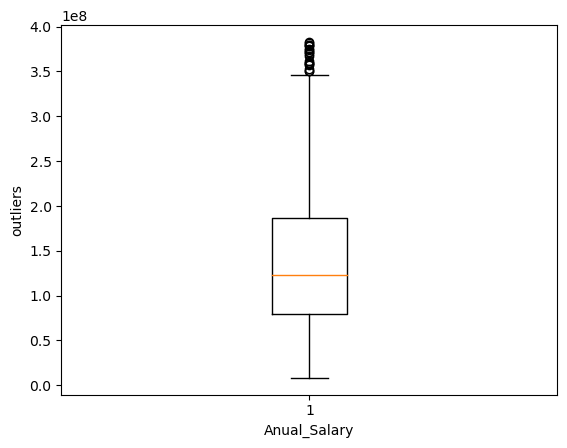

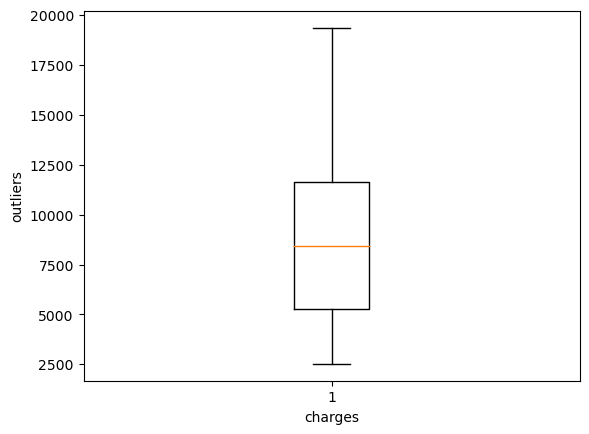

In [34]:
# Checking if all the outliers are removed by Boxplot again

for itr in col:
  if(df[itr].dtypes=='int64' or df[itr].dtypes=='float64'):
    plt.boxplot(df[itr])
    plt.xlabel(itr)
    plt.ylabel('outliers')
    plt.show()

In [35]:
# Correlation
# There should be no outliers to get below chart

corr = df.corr(numeric_only=True)
corr

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.190583,-0.145128,0.063121,0.135213,0.656257,0.120206,NaN,0.402103,0.559043
bmi,0.190583,1.000000,0.007119,-0.002899,-0.017522,0.049064,0.024304,NaN,0.001234,0.013032
children,-0.145128,0.007119,1.000000,0.006232,-0.002845,-0.005306,-0.058653,NaN,-0.058766,-0.043043
Claim_Amount,0.063121,-0.002899,0.006232,1.000000,0.046898,0.177546,0.031691,NaN,0.144497,0.174483
past_consultations,0.135213,-0.017522,-0.002845,0.046898,1.000000,0.257996,0.097273,NaN,0.260969,0.271218
num_of_steps,0.656257,0.049064,-0.005306,0.177546,0.257996,1.000000,0.329985,NaN,0.834765,0.958288
Hospital_expenditure,0.120206,0.024304,-0.058653,0.031691,0.097273,0.329985,1.000000,NaN,0.380122,0.372944
NUmber_of_past_hospitalizations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anual_Salary,0.402103,0.001234,-0.058766,0.144497,0.260969,0.834765,0.380122,NaN,1.000000,0.914071
charges,0.559043,0.013032,-0.043043,0.174483,0.271218,0.958288,0.372944,NaN,0.914071,1.000000


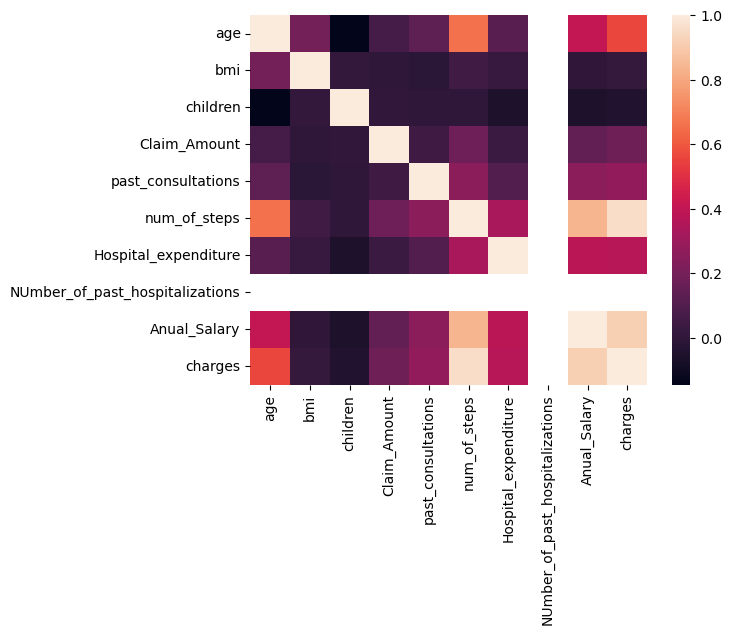

In [36]:
sns.heatmap(corr);

In [37]:
# MODEL BUILDING
# to locate the target column and store it in y as dependant variable
# Target column is always at the end

y = df.iloc[:,-1]

In [38]:
# to store all the feature other than target in x as independant variables

x = df.loc[:,['age','bmi','children','Claim_Amount','past_consultations','num_of_steps','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary']]

# Write all the remaining columns and store in the variable x

In [39]:
# Splitting the variable i.e. x and y

# The variable x and y are split into 2 different categories making it 4 variables in the end
# x_train , x_test , y_train , y_test

# Training data is for actual values
# Testing data is for predicted values

In [48]:
from sklearn.model_selection import train_test_split
# Test size = 0.2 means 20% data for test,80% for training(Always keep it less than 50%)
# Random state defines how fast input will convert into output into background of trainng state

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# Create the model and stored in the variable lr
lr = LinearRegression()
lr

LinearRegression()

In [43]:
# .fit() method is used to provide the training data as input in the machine
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
# Using the test variables (x_test and y_test) perform predcitions of results i.e. predicted outcomes
# Create a variable and make use of .predict() with x_test as an input in it
# This gives us the output values that are predicted outputs that are received from the training data

In [54]:
# Predicted values of charges
pred = lr.predict(x_test)
pred

array([ 9970.29352515,  6197.59868639, 12351.15822266,  5581.74624459,
       11748.27134317, 12812.50918186,  3037.1610872 , 13167.60719227,
        9665.80451078,  4705.13785525, 13643.66883105,  7086.00493065,
       12071.01006725, 11395.8186353 , 16927.09653171, 11929.19297782,
        9332.92807938,  8293.63482982,  8586.16117239, 11503.1068467 ,
        9148.50363215,  9571.61738109, 12169.55664292,  3980.95507647,
       12155.64734604,  7504.25717132,  3011.7314576 , 11471.7238663 ,
        6467.56341089, 11475.73378734,  4055.25057538, 11149.40449364,
       11947.74550236, 12590.45556233,  4663.1693736 ,  8802.89957907,
        2559.78544031,  8246.5337881 ,  2284.4282448 ,  9113.20111426,
       12592.81052665,  3641.28485358,  9754.34055877, 15921.12010618,
        6820.97300133,  6222.41712718,  9273.9310652 ,  6681.84181454,
        2688.12959609, 13508.57480923,  5280.31500644,  9892.9414794 ,
       10498.73928015,  9512.91446911, 12616.69353423,  2639.92661616,
      

In [50]:
# Compare with y_test for better understanding of
# accuracy of the model built for the comparison of expected outputs and predicted outputs

# In short calculate r2s
from sklearn.metrics import *

In [51]:
# Goodness of Fit Score
# Comparing y test result from x test i.e pred
score = r2_score(y_test,pred)
score

0.9623904727192971

In [ ]:
# Conclusion
# r2s = 96.23%

# This shows the model is a good fit for Linear regression algorithm

In [ ]:
# Solution if not a good fit:

# Perform feature selection i.e. Vif or Iv, Rfe (Will be taught in Future)
# Use the different algorithms available i.e. Decision Tree Regressor or Random Forest regressor

In [56]:
# compare model_Answers with y_test correct testing answers

# Compare both values by a table

result=pd.DataFrame(columns=["Actual values" ,"Predicted values"])

result["Actual values"] =y_test
result["Predicted values"]=pred

result

,Actual values,Predicted values
625,8627.54110,9970.293525
480,6664.68595,6197.598686
841,11938.25595,12351.158223
476,6610.10970,5581.746245
859,12233.82800,11748.271343
...,...,...
619,8601.32930,9022.023127
269,4005.42250,3328.811904
638,8871.15170,9100.533483
176,2789.05740,1903.644739


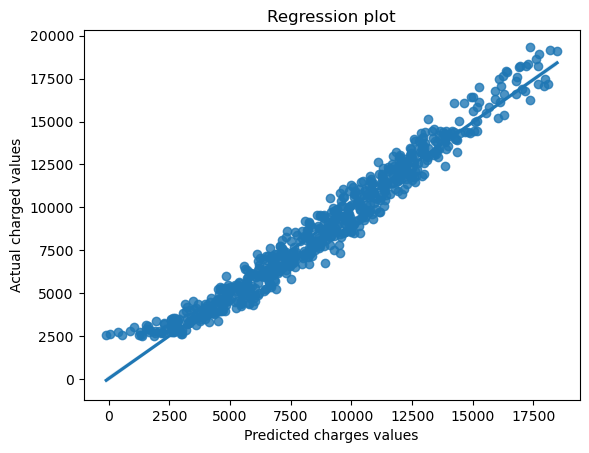

In [58]:
sns.regplot(x=pred , y=y_test)
plt.xlabel("Predicted charges values")
plt.ylabel("Actual charged values")
plt.title("Regression plot")
plt.show()